# CoreMS Tutorial

`CoreMS` framework for mass spectrum


### 1. Import Bruker Transient File


m/z count 10588
first m/z 155.87356993477135 final m/z 999.6601693609396


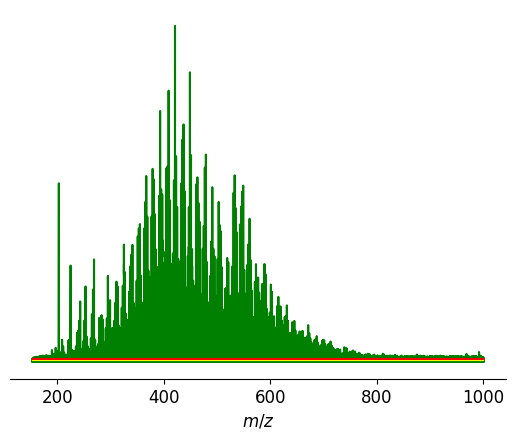

In [1]:
import sys
import os
from pathlib import Path
from matplotlib import pyplot

from corems.encapsulation.factory.parameters import MSParameters
from corems.transient.input.brukerSolarix import ReadBrukerSolarix

sys.path.append("../../")
data_path = Path(os.getenv("COREMS_DATA_PATH", "/home/corems/data"))

# file_location = "/home/corems/data/ftms/ESI_NEG_SRFA.d"
file_location = data_path / "ftms" / "ESI_NEG_SRFA.d"

MSParameters.transient.apodization_method = "Hanning"
MSParameters.transient.number_of_truncations = 0
MSParameters.transient.number_of_zero_fills = 1

MSParameters.mass_spectrum.noise_threshold_method = "relative_abundance"
MSParameters.mass_spectrum.noise_threshold_min_relative_abundance = 1

# MSParameters.mass_spectrum.noise_threshold_method = 'signal_noise'
# MSParameters.mass_spectrum.noise_threshold_min_s2n = 50

# MSParameters.mass_spectrum.noise_threshold_method = 'auto'
# MSParameters.mass_spectrum.noise_threshold_min_std = 32

MSParameters.ms_peak.peak_min_prominence_percent = 1


def import_transient():
    with ReadBrukerSolarix(file_location) as bruker_transient:
        mass_spectrum = bruker_transient.get_mass_spectrum(
            plot_result=False, auto_process=True
        )

        mass_spectrum.plot_profile_and_noise_threshold()

        print("m/z count", len(mass_spectrum))

        print(
            "first m/z",
            mass_spectrum.mspeaks[0].mz_exp,
            "final m/z",
            mass_spectrum.mspeaks[-1].mz_exp,
        )

    return mass_spectrum


mass_spectrum = import_transient()

In [ ]:
# reader_obj = ReadMassList(file_location, isCentroid=True)
# reader_obj = ReadMassList(file_location)
# reader_obj = ReadMassList(file_location)
# reader_obj = ReadHDF_BoosterMassSpectrum(file_location, polarity)

### 2. Import Centroid Mass List Files


_Needs troubleshooting_


In [6]:
from matplotlib import pyplot

from corems.encapsulation.factory.parameters import MSParameters
from corems.mass_spectrum.input.massList import ReadMassList


def import_centroid():
    # file_location = Path("data") / "ftms" / "ESI_NEG_ESFA.ascii"
    file_location = data_path / "ftms" / "ESI_NEG_ESFA.ascii"

    # load any type of mass list file i.e : "," for csv, "\t" for tabulated mass list, etc
    # Needs for columns: m/z, peak heightk, s/n and resolving power
    mass_list_reader = ReadMassList(file_location)

    # polarity need to be set or read from the file
    polarity = -1

    # Change Threshold Parameters:
    # MSParameters.mass_spectrum.noise_threshold_method = 'relative_abundance'
    # MSParameters.mass_spectrum.noise_threshold_min_relative_abundance = 30

    # MSParameters.mass_spectrum.noise_threshold_method = 'signal_noise'
    # MSParameters.mass_spectrum.noise_threshold_min_s2n = 100

    MSParameters.mass_spectrum.noise_threshold_method = "auto"
    MSParameters.mass_spectrum.noise_threshold_min_std = 6

    mass_spectrum = mass_list_reader.get_mass_spectrum(polarity, auto_process=True)

    print(mass_spectrum.baseline_noise, mass_spectrum.baseline_noise_std)
    print(len(mass_spectrum))
    # mass_spectrum.plot_mz_domain_profile()
    mass_spectrum.plot_profile_and_noise_threshold()

    pyplot.show()

    print(
        "number_average_molecular_weight",
        mass_spectrum.number_average_molecular_weight(),
    )
    print(
        "weight_average_molecular_weight",
        mass_spectrum.weight_average_molecular_weight(),
    )
    return mass_spectrum


mass_spectrum = import_centroid()

Exception: auto method was not implemented, please refer to corems.mass_spectrum.calc.NoiseCalc Class

### Import Profile Mass List Files


_Needs troubleshooting_


In [7]:
from matplotlib import pyplot

from corems.encapsulation.factory.parameters import MSParameters
from corems.mass_spectrum.input.massList import ReadMassList

file_location = data_path / "ftms" / "Thermo_Profile_MassList.txt"

MSParameters.mass_spectrum.noise_threshold_method = "auto"
MSParameters.mass_spectrum.noise_threshold_min_std = 3


# isThermoProfile sets a exception to allow the parser of files with only two columns, i.e. m/z and abundance
# however features that depends on s/n and or resolving power will throw a error
def import_profile():
    mass_list_reader = ReadMassList(
        file_location, header_lines=7, isCentroid=False, isThermoProfile=True
    )

    polarity = +1

    mass_spectrum = mass_list_reader.get_mass_spectrum(
        polarity, auto_process=True, loadSettings=False
    )

    mass_spectrum.plot_profile_and_noise_threshold()

    pyplot.show()

    return mass_spectrum


mass_spectrum = import_profile()

Exception: auto method was not implemented, please refer to corems.mass_spectrum.calc.NoiseCalc Class

### 3. Access mass spectrum peak objects


_Works with first cell_


In [2]:
kb = {"C": 1, "H": 2}

print(
    "m/z",
    "peak height",
    "resolving power",
    "S/N",
    "Kendrick Mass Defect",
    "Has Molecular Formula Obj",
)

for mspeak in mass_spectrum.sort_by_abundance():
    print(
        mspeak.mz_exp,
        mspeak.abundance,
        mspeak.resolving_power,
        mspeak.signal_to_noise,
        mspeak.kmd,
        mspeak.is_assigned,
    )

    mspeak.change_kendrick_base(kb)


m/z peak height resolving power S/N Kendrick Mass Defect Has Molecular Formula Obj
207.88292840717156 427525.793186123 774565.7177918004 1.6197546163739491 -0.6508035171562483 False
171.77404666928626 427810.95168100233 937387.9676981523 1.636799610854837 -0.5822414450857707 False
171.17425150670854 428083.63437673985 752538.1743541526 1.6036699032722663 -0.9831160219003721 False
226.79835131813633 428230.46708575386 405694.41022961895 1.6073909936166855 -0.5451052110184662 False
245.59788422057045 428259.58865482075 655620.4679096205 1.6252762343043776 -0.3236463007012844 False
215.98880602542104 428645.5325113004 745496.9679283466 1.6127925763747133 -0.7476300028041578 False
367.80432729399405 428663.2822404946 350227.37432724884 1.6196345812015485 -0.39363200662995723 False
194.23470028485858 430405.78690058657 473709.5530986071 1.614473068788322 -0.017815190992337193 False
176.48511656733365 432202.4808045314 912365.4676983687 1.6502435501637063 -0.2880508987555572 False
626.976738

### 4. How to change settings


In [3]:
# Option 1. Before Mass Spectrum Creation
from corems.encapsulation.factory.parameters import MSParameters

# Data input
MSParameters.data_input.add_mz_label = "moz"

# Transient
MSParameters.transient.number_of_zero_fills = 1

# Mass Spectrum
MSParameters.mass_spectrum.min_calib_ppm_error = -1
MSParameters.mass_spectrum.max_calib_ppm_error = 1
MSParameters.mass_spectrum.noise_threshold_min_std = 2

# Molecular Formula Search
MSParameters.molecular_search.max_dbe = 40
MSParameters.molecular_search.min_dbe = 10

# Mass Spectrum Peak Obj
MSParameters.ms_peak.kendrick_base = {"C": 1, "H": 2}

# Option 2. After mass spectrum object is created you can manually change the settings inside the object:

# Mass Spectrum
mass_spectrum.settings.do_calibration = True

# Molecular Formula Search
mass_spectrum.molecular_search_settings.error_method = "None"
mass_spectrum.molecular_search_settings.min_ppm_error = -1
mass_spectrum.molecular_search_settings.max_ppm_error = 1
mass_spectrum.molecular_search_settings.mz_error_range = 1

mass_spectrum.molecular_search_settings.usedAtoms["C"] = (1, 90)
mass_spectrum.molecular_search_settings.usedAtoms["H"] = (4, 200)
mass_spectrum.molecular_search_settings.usedAtoms["O"] = (0, 25)
mass_spectrum.molecular_search_settings.usedAtoms["N"] = (0, 5)
mass_spectrum.molecular_search_settings.usedAtoms["S"] = (0, 2)

# Mass Spectrum Peak Obj
mass_spectrum.mspeaks_settings


MassSpecPeakSetting(kendrick_base={'C': 1, 'H': 2}, kendrick_rounding_method='floor', implemented_kendrick_rounding_methods=('floor', 'ceil', 'round'), peak_derivative_threshold=0.0, peak_min_prominence_percent=1.0, min_peak_datapoints=5.0, peak_max_prominence_percent=0.1, peak_height_max_percent=10.0, legacy_resolving_power=True, legacy_centroid_polyfit=False)

### 5. Mass spectrum calibration


m/z count 10588
first m/z 155.87356993477135 final m/z 999.6601693609396
MS Obj loaded - 10588 peaks found.
Reference mass list loaded - 60 calibration masses loaded.
26 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.792 ppm
minimize function performed 369 fn evals and 6 iterations


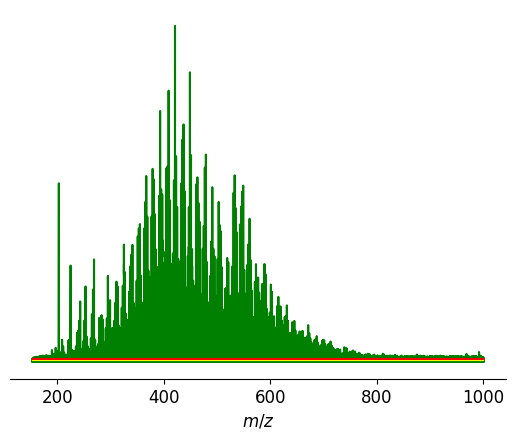

In [4]:
from corems.encapsulation.factory.parameters import MSParameters
from corems.mass_spectrum.calc.Calibration import MzDomainCalibration

MSParameters.mass_spectrum.min_calib_ppm_error = -5
MSParameters.mass_spectrum.max_calib_ppm_error = 5
MSParameters.mass_spectrum.max_calib_ppm_error = 5


mass_spectrum = import_transient()

ref_file_location = data_path / "ftms" / "SRFA.ref"

MzDomainCalibration(mass_spectrum, ref_file_location).run()


### 6. Molecular formula search


100%|██████████| 450/450 [00:01<00:00, 245.18it/s]


Started database insert using 29 iterations for a total of 1429873 rows


29it [00:58,  2.02s/it]


'runworker'  62643.70 ms


Loading molecular formula database: 432444it [00:38, 11329.88it/s]
Started molecular formula search for class {"N": 3, "S": 2, "O": 25}, (de)protonated : 100%|██████████| 300/300 [00:18<00:00, 16.42it/s]
Loading molecular formula database: 204094it [00:19, 10608.68it/s]
Started molecular formula search for class {"N": 5, "S": 2, "O": 25}, (de)protonated : 100%|██████████| 150/150 [00:06<00:00, 23.97it/s]


'run_molecular_formula'  145563.39 ms
5278 assigned peaks and 5310 unassigned peaks, total  = 49.85 %, relative abundance = 75.19 %, RMS error (best candidate) (ppm) = 0.558


<Axes: xlabel='$\t{m/z}$', ylabel='Abundance'>

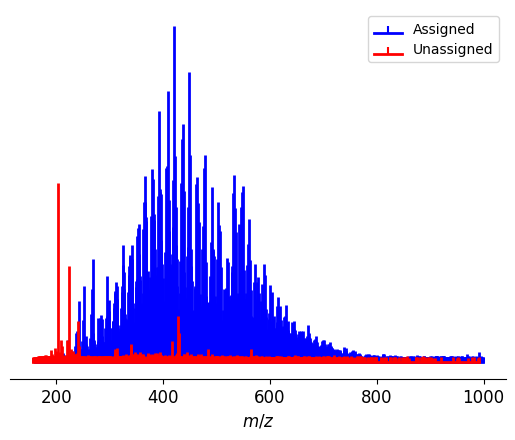

In [5]:
from corems.molecular_id.search.molecularFormulaSearch import SearchMolecularFormulas
from corems.molecular_id.factory.classification import HeteroatomsClassification

# mass_spectrum.molecular_search_settings.url_database = "path_to_db"

mass_spectrum.molecular_search_settings.error_method = "None"
mass_spectrum.molecular_search_settings.min_ppm_error = -1
mass_spectrum.molecular_search_settings.max_ppm_error = 1

mass_spectrum.molecular_search_settings.min_dbe = 0
mass_spectrum.molecular_search_settings.max_dbe = 50

mass_spectrum.molecular_search_settings.isProtonated = True
mass_spectrum.molecular_search_settings.isRadical = False
mass_spectrum.molecular_search_settings.isadduct = True

mass_spectrum.molecular_search_settings.usedAtoms["C"] = (1, 90)
mass_spectrum.molecular_search_settings.usedAtoms["H"] = (4, 200)
mass_spectrum.molecular_search_settings.usedAtoms["O"] = (1, 25)
mass_spectrum.molecular_search_settings.usedAtoms["N"] = (0, 5)
mass_spectrum.molecular_search_settings.usedAtoms["S"] = (0, 2)

SearchMolecularFormulas(mass_spectrum, first_hit=True).run_worker_mass_spectrum()
mass_spectrum.percentile_assigned(report_error=True)

mass_spectrum_by_classes = HeteroatomsClassification(
    mass_spectrum, choose_molecular_formula=True
)
mass_spectrum_by_classes.plot_ms_assigned_unassigned()


### 7. Accessing the molecular formula objects


In [16]:
for mspeaks in mass_spectrum.sort_by_abundance():
    if mspeak:  # or just if mspeak:
        for mf in mspeaks:
            print(mf.mz_calc, mf.dbe, mf.class_label, mf.string_formated)


In [17]:
print(mass_spectrum.analyzer)

ICR


### 8. Export the results


In [21]:
# exporting data
base_dir = Path("/home/corems/data")
exports_dir = base_dir / "exports"

# Create output paths for different formats
csv_file = exports_dir / "sample1.csv"
hdf_file = exports_dir / "sample1.h5"
pkl_file = exports_dir / "sample1.pkl"

# Save in different formats
mass_spectrum.to_csv(str(csv_file))
mass_spectrum.to_hdf(str(hdf_file))
mass_spectrum.to_pandas(str(pkl_file))

# get pandas Dataframe
df = mass_spectrum.to_dataframe()

In [20]:
df.head()

,Index,m/z,Calibrated m/z,Calculated m/z,Peak Height,Peak Area,Resolving Power,S/N,Ion Charge,m/z Error (ppm),...,Heteroatom Class,Ion Type,Adduct,Is Isotopologue,Mono Isotopic Index,Molecular Formula,C,H,O,13C
0,17,161.097156,161.097255,161.097189,5.015108e+05,74.120584,799611.574328,1.903278,-1,0.409092,...,O1,de-protonated,NaN,0.0,NaN,C11 H14 O1,11.0,14.0,1.0,NaN
1,793,191.092680,191.092502,191.092497,4.756492e+05,60.985519,842622.467990,1.820693,-1,0.023213,...,O5,de-protonated,NaN,0.0,NaN,C8 H16 O5,8.0,16.0,5.0,NaN
2,1319,213.004603,213.004234,213.004076,1.133884e+06,413.725135,503960.311987,4.251166,-1,0.742070,...,O7,de-protonated,NaN,0.0,NaN,C8 H6 O7,8.0,6.0,7.0,NaN
3,1320,213.041032,213.040664,213.040462,8.952677e+05,257.869963,604649.174308,3.361945,-1,0.948520,...,O6,de-protonated,NaN,0.0,NaN,C9 H10 O6,9.0,10.0,6.0,NaN
4,1361,215.035472,215.035087,215.034982,6.310215e+05,96.654704,748801.968079,2.443436,-1,0.485566,...,O4,de-protonated,NaN,0.0,NaN,C12 H8 O4,12.0,8.0,4.0,NaN
